In [ ]:
# --- Robust environment loader (works in Colab and VS Code) ---
import os
import pandas as pd

def load_csv_crossenv(filename):
    # If file exists in working dir, use it
    if os.path.exists(filename):
        print(f"Loading local file: {filename}")
        return pd.read_csv(filename)
    # Try Colab upload if available
    try:
        # from google.colab import files  # commented - using cross-env loader
        print("File not found locally — please upload the file in Colab now.")
        # uploaded = files.upload()  # commented - using cross-env loader
        # If exact filename uploaded, use it, else use the first uploaded file
        if filename in uploaded:
            return pd.read_csv(filename)
        else:
            first = next(iter(uploaded.keys()))
            print(f"Using uploaded file: {first} instead of {filename}")
            return pd.read_csv(first)
    except Exception:
        raise FileNotFoundError(f"{filename} not found. Place the file in the notebook folder or update the filename.")

# Load dataset into df variable
data_path = "menu.csv"
df = load_csv_crossenv(data_path)
print("Loaded dataset shape:", getattr(df, 'shape', None))


# Menu / Nutrition EDA – Dataset 2 (Level 1, Task 1)

This notebook performs **Exploratory Data Analysis (EDA)** on the menu / nutrition dataset.
We will:
1. Load and inspect the dataset  
2. Explore missing values and basic statistics  
3. Analyse calories and macro-nutrients by item and category  
4. Identify high-calorie vs relatively healthier categories  
5. Summarise insights that can support menu design and recommendations

In [1]:
# === 0. Setup – Imports & Settings ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use("default")
sns.set()
pd.set_option("display.max_columns", None)

# Ensure images directory exists
img_dir = os.path.join("..", "images")
os.makedirs(img_dir, exist_ok=True)


In [2]:
#=== 1. Upload dataset ===
# from google.colab import files  # commented - using cross-env loader
# uploaded = files.upload()  # commented - using cross-env loader
df = df


Saving menu.csv to menu.csv


In [3]:
# === 2. Basic Overview & Missing Values ===

print("Data types and non-null counts:")
df.info()

print("\nDescriptive statistics for numeric columns:")
display(df.describe())

print("\nMissing values per column:")
display(df.isna().sum().sort_values(ascending=False))

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium            

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,20.676923,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,24.034954,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,4.750000,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,8.000000,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,36.250000,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,150.000000,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000



Missing values per column:


,0
Category,0
Item,0
Serving Size,0
Calories,0
Calories from Fat,0
Total Fat,0
Total Fat (% Daily Value),0
Saturated Fat,0
Saturated Fat (% Daily Value),0
Trans Fat,0


In [4]:
# === 3. Data Cleaning (Simple) ===

df_clean = df.copy()

# 3.1 Trim whitespace from object columns
obj_cols = df_clean.select_dtypes(include=["object"]).columns
for col in obj_cols:
    df_clean[col] = df_clean[col].astype(str).str.strip()

# 3.2 Handle missing numeric values (fill with median)
num_cols = df_clean.select_dtypes(include=[np.number]).columns
for col in num_cols:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

print("After cleaning:")
df_clean.info()

After cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260

/tmp/ipython-input-2673200598.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)


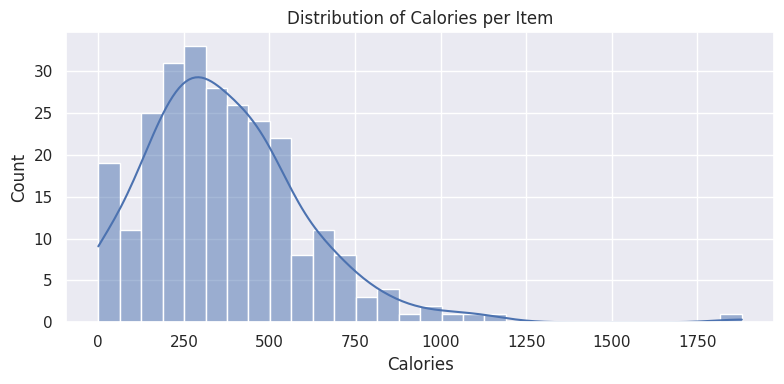

Nutrition columns used: ['Calories from Fat', 'Total Fat', 'Saturated Fat', 'Cholesterol', 'Sodium', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein']


In [5]:
# === 4. Calories & Nutritional Distributions ===

if "Calories" in df_clean.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df_clean["Calories"], bins=30, kde=True)
    plt.title("Distribution of Calories per Item")
    plt.xlabel("Calories")
    plt.tight_layout()
    plt.savefig(os.path.join(img_dir, "menu_calories_distribution.png"))
    plt.show()

# Pick some common nutrition columns if they exist
nutr_cols = []
for c in ["Calories from Fat", "Total Fat", "Saturated Fat", "Cholesterol",
          "Sodium", "Carbohydrates", "Dietary Fiber", "Sugars", "Protein"]:
    if c in df_clean.columns:
        nutr_cols.append(c)

print("Nutrition columns used:", nutr_cols)

,Calories from Fat,Total Fat,Saturated Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Calories
Category,,,,,,,,,,
Chicken & Fish,242.222222,26.962963,6.166667,75.370370,1257.777778,49.074074,2.925926,7.333333,29.111111,552.962963
Smoothies & Shakes,127.678571,14.125000,8.375000,45.000000,183.571429,90.428571,1.464286,77.892857,10.857143,531.428571
Breakfast,248.928571,27.690476,10.654762,152.857143,1211.071429,49.761905,3.261905,8.261905,19.857143,526.666667
Beef & Pork,224.666667,24.866667,10.466667,87.333333,1020.666667,40.133333,2.533333,8.800000,27.333333,494.000000
Coffee & Tea,71.105263,8.021053,4.921053,27.263158,136.894737,44.526316,0.778947,39.610526,8.863158,283.894737
Salads,108.333333,11.750000,3.750000,51.666667,588.333333,21.666667,4.500000,6.833333,19.833333,270.000000
Snacks & Sides,94.615385,10.538462,2.692308,18.461538,395.769231,29.153846,1.538462,4.076923,8.384615,245.769231
Desserts,64.285714,7.357143,4.285714,15.000000,117.142857,34.857143,1.000000,26.142857,4.000000,222.142857
Beverages,0.740741,0.092593,0.055556,0.555556,41.481481,28.814815,0.037037,27.851852,1.333333,113.703704


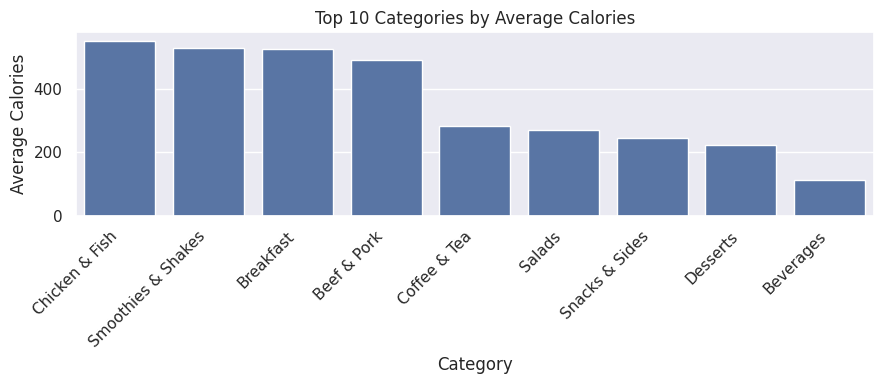

In [6]:
# === 5. Average Nutrition by Category ===

if "Category" in df_clean.columns and "Calories" in df_clean.columns:
    category_nutrition = df_clean.groupby("Category")[nutr_cols + ["Calories"]].mean()
    category_nutrition = category_nutrition.sort_values("Calories", ascending=False)
    display(category_nutrition)

    # Top 10 categories by average calories
    top_cat_cal = category_nutrition["Calories"].head(10)
    plt.figure(figsize=(9,4))
    sns.barplot(x=top_cat_cal.index, y=top_cat_cal.values)
    plt.title("Top 10 Categories by Average Calories")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Average Calories")
    plt.tight_layout()
    plt.savefig(os.path.join(img_dir, "menu_categories_avg_calories.png"))
    plt.show()

In [7]:
# === 6. Highest-Calorie Items & Relatively Healthier Options ===

if {"Item", "Calories"}.issubset(df_clean.columns):
    # Top 10 highest calorie items
    top_items = df_clean.sort_values("Calories", ascending=False).head(10)
    print("Top 10 highest-calorie items:")
    display(top_items[["Category", "Item", "Calories"] + [c for c in nutr_cols if c in top_items.columns]])

    # Example: "Healthier" items filter – below median calories but decent protein
    if "Protein" in df_clean.columns:
        median_cal = df_clean["Calories"].median()
        median_protein = df_clean["Protein"].median()
        healthier = df_clean[(df_clean["Calories"] <= median_cal) &
                               (df_clean["Protein"] >= median_protein)]

        print("\nSample of relatively 'healthier' items (lower calories, higher protein):")
        display([healthier[["Category", "Item", "Calories", "Protein"]].head(10)])

Top 10 highest-calorie items:


,Category,Item,Calories,Calories from Fat,Total Fat,Saturated Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein
82,Chicken & Fish,Chicken McNuggets (40 piece),1880,1060,118.0,20.0,265,3600,118,6,1,87
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),1150,540,60.0,20.0,575,2260,116,7,17,36
31,Breakfast,Big Breakfast with Hotcakes (Regular Biscuit),1090,510,56.0,19.0,575,2150,111,6,17,36
34,Breakfast,Big Breakfast with Hotcakes and Egg Whites (La...,1050,450,50.0,16.0,55,2290,115,7,18,35
33,Breakfast,Big Breakfast with Hotcakes and Egg Whites (Re...,990,410,46.0,16.0,55,2170,110,6,17,35
81,Chicken & Fish,Chicken McNuggets (20 piece),940,530,59.0,10.0,135,1800,59,3,0,44
253,Smoothies & Shakes,McFlurry with M&M’s Candies (Medium),930,290,33.0,20.0,75,260,139,2,128,20
249,Smoothies & Shakes,Chocolate Shake (Large),850,210,23.0,15.0,85,380,141,2,120,19
246,Smoothies & Shakes,Strawberry Shake (Large),850,210,24.0,15.0,90,260,140,0,123,18
251,Smoothies & Shakes,Shamrock Shake (Large),820,210,23.0,15.0,90,260,135,0,115,18



Sample of relatively 'healthier' items (lower calories, higher protein):


[          Category                                            Item  Calories  \
 0        Breakfast                                    Egg McMuffin       300   
 1        Breakfast                               Egg White Delight       250   
 37       Breakfast                                 Sausage Burrito       300   
 48     Beef & Pork                                       Hamburger       240   
 49     Beef & Pork                                    Cheeseburger       290   
 79  Chicken & Fish                     Chicken McNuggets (6 piece)       280   
 86          Salads  Premium Bacon Ranch Salad with Grilled Chicken       220   
 89          Salads    Premium Southwest Salad with Grilled Chicken       290   
 90  Snacks & Sides        Chipotle BBQ Snack Wrap (Crispy Chicken)       340   
 91  Snacks & Sides       Chipotle BBQ Snack Wrap (Grilled Chicken)       260   
 
     Protein  
 0        17  
 1        18  
 37       12  
 48       12  
 49       15  
 79       13  
 8

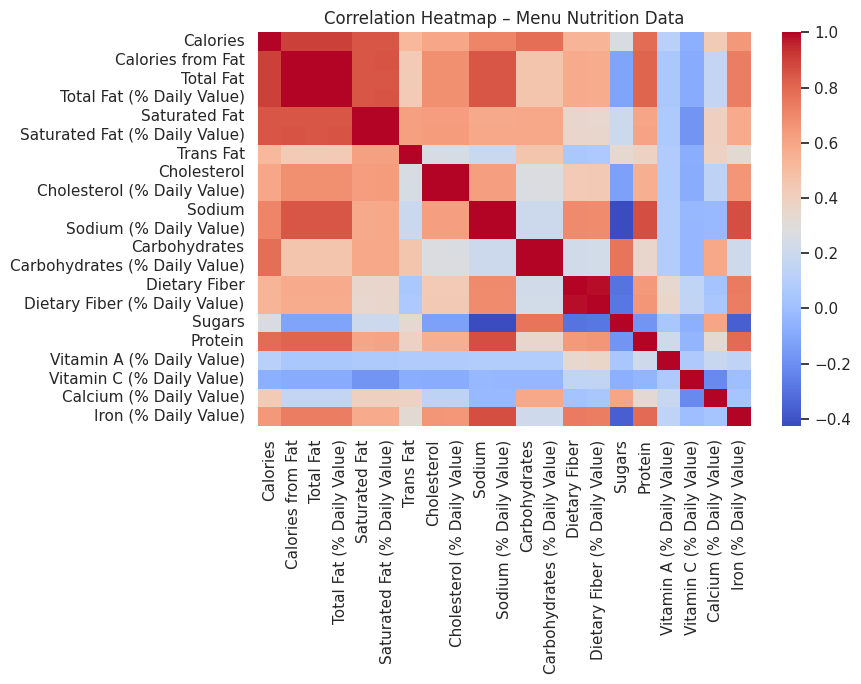

In [8]:
# === 7. Correlation Between Nutrition Metrics ===

num_cols_menu = df_clean.select_dtypes(include=[np.number]).columns.tolist()
if num_cols_menu:
    plt.figure(figsize=(9,7))
    sns.heatmap(df_clean[num_cols_menu].corr(), annot=False, cmap="coolwarm")
    plt.title("Correlation Heatmap – Menu Nutrition Data")
    plt.tight_layout()
    plt.savefig(os.path.join(img_dir, "menu_correlation_heatmap.png"))
    plt.show()

# === 8. Summary of Insights & Recommendations ===

## Key Insights (Menu / Nutrition)

- Some **categories** clearly have much higher average calories; these likely correspond to fried items, desserts, or large-sized meals.  
- Other categories are relatively **lower in calories** but can still provide reasonable protein, making them better choices for health-conscious customers.  
- The **highest-calorie items** table highlights specific menu items that significantly increase a customer's total calorie intake in one meal.  
- The correlation heatmap may show that calories are highly correlated with **Calories from Fat**, **Total Fat**, and sometimes with **Sugars**.

## Recommendations for the Business

- Promote a **“healthy choices”** section in the menu based on items with lower calories and higher protein.  
- Clearly label or de-emphasise the **very high-calorie** items, or offer smaller portion sizes of them.  
- Use the category-level nutrition insights to design **balanced combo meals** (e.g., pairing a higher-calorie main item with a lighter side).  
- Share basic nutrition information with customers (in-store menus, website, app) to support informed decision-making.


## Recommendations & Conclusions

- Insight: The menu categories with highest average calories may need healthier alternatives.
- Insight: Some items have missing nutritional info; validate ingredient sources.

**Recommendations:**
1. Update menu to include lower-calorie options for top-selling categories.
2. Standardize nutrition labeling to reduce missing values.


In [ ]:
# Programmatic summary for recommendations (auto-generated)
if 'Product Category' in df.columns and 'Total Amount' in df.columns:
    top_categories = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).head(5)
    print("Top categories by revenue:\n", top_categories)
else:
    print("Top categories / revenue data not available for auto-summary.")